In [31]:
#import libraries
import pandas as pd
import mysql.connector
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Connect sql
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="******",
    database="****"
)
cursor = conn.cursor()

In [3]:
# Run SHOW TABLES query
cursor.execute("SHOW TABLES")

# Fetch all tables
tables = cursor.fetchall()

# Convert to pandas DataFrame
tables_df = pd.DataFrame(tables, columns=['Tables'])

# Show the table list
print(tables_df)


                        Tables
0                 dim_customer
1                  dim_product
2             fact_gross_price
3      fact_manufacturing_cost
4  fact_pre_invoice_deductions
5           fact_sales_monthly


In [4]:
# Define the table names and corresponding variable names
table_names = {
    "dim_customer": "dim_customer_df",
    "dim_product": "dim_product_df",
    "fact_gross_price": "fact_gross_price_df",
    "fact_manufacturing_cost": "fact_manufacturing_cost_df",
    "fact_pre_invoice_deductions": "fact_pre_invoice_deductions_df",
    "fact_sales_monthly": "fact_sales_monthly_df"
}

# Load each table into its own pandas DataFrame
for table, var_name in table_names.items():
    query = f"SELECT * FROM {table}"
    df = pd.read_sql(query, conn)
    globals()[var_name] = df  # Dynamically create variable with name var_name


C:\Users\prvzs\AppData\Local\Temp\ipykernel_16416\2851594849.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


### 1. Identify the markets in which the customer "Atliq Exclusive" operates its business in the APAC region. Present the findings in an insightful way

In [8]:
# Step 1: Filter for customer 'Atliq Exclusive' in APAC
atliq_apac_customers = dim_customer_df[
    (dim_customer_df['customer'] == 'Atliq Exclusive') &
    (dim_customer_df['region'] == 'APAC')
]

# Step 2: Get distinct markets they operate in
markets_operated = atliq_apac_customers['market'].unique()

# Step 3: Display the markets
print("Markets where 'Atliq Exclusive' operates in APAC:")
for market in markets_operated:
    print(f"- {market}")


Markets where 'Atliq Exclusive' operates in APAC:
- India
- Indonesia
- Japan
- Philiphines
- South Korea
- Australia
- Newzealand
- Bangladesh


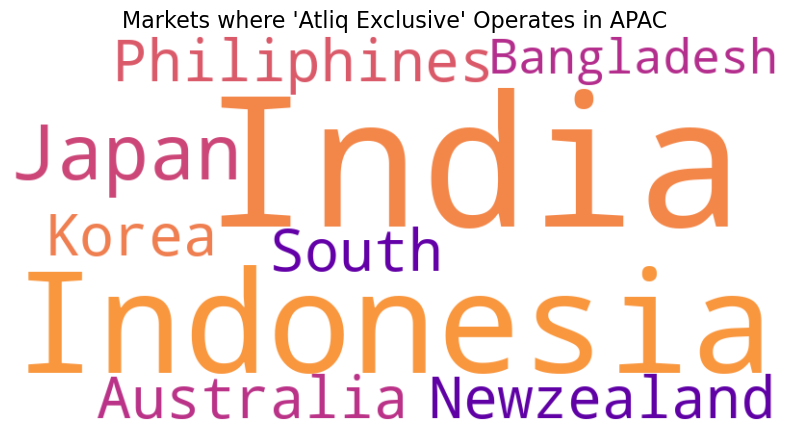

In [34]:
# Convert market column into a space-separated string
market_text = " ".join(markets_operated)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(market_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Markets where 'Atliq Exclusive' Operates in APAC", fontsize=16)
plt.show()

### 2. Compare the unique product counts between 2020 and 2021. Calculate the percentage change and present the analysis

In [11]:
dim_product_df.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [12]:
fact_gross_price_df.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2020,16.2323
1,A0118150101,2021,19.0573
2,A0118150102,2020,19.8577
3,A0118150102,2021,21.4565
4,A0118150103,2020,22.1317


In [16]:
len(dim_product_df['product'].unique())

73

In [19]:
products_gross_df = pd.merge(dim_product_df, fact_gross_price_df, how='inner', on='product_code')

In [21]:
products_gross_dff

,product_code,division,segment,category,product,variant,fiscal_year,gross_price
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2020,16.2323
1,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,2021,19.0573
2,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus,2020,19.8577
3,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus,2021,21.4565
4,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium,2020,22.1317


In [23]:
products_gross_2020 = products_gross_df[products_gross_df['fiscal_year'] == 2020] # products in 2020
products_gross_2021 = products_gross_df[products_gross_df['fiscal_year'] == 2021] #products in 2021

In [25]:
unique_products_2020 = products_gross_2020['product_code'].nunique()
unique_products_2021 = products_gross_2021['product_code'].nunique()

In [26]:
unique_products_2020

245

In [27]:
percentage_change = ((unique_products_2021 - unique_products_2020) / unique_products_2020) * 100
percentage_change

36.3265306122449

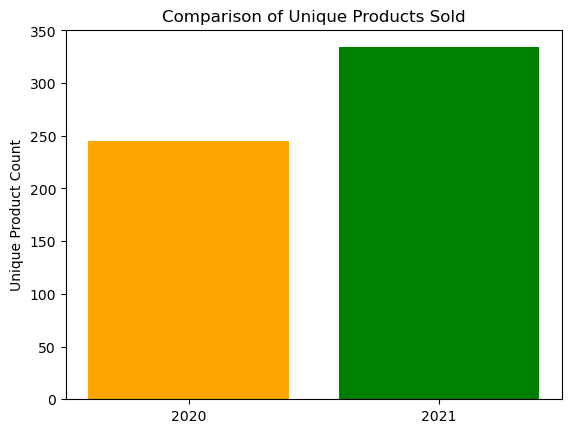

In [28]:
import matplotlib.pyplot as plt

plt.bar(['2020', '2021'], [unique_products_2020, unique_products_2021], color=['orange', 'green'])
plt.title("Comparison of Unique Products Sold")
plt.ylabel("Unique Product Count")
plt.show()

### 3. Analyze the unique product counts for each segment. The results should be sorted in descending order of their counts.


In [41]:
# Count unique products per segment
unique_products_by_segment = (
    dim_product_df
    .groupby('segment')['product_code']
    .nunique()
    .reset_index(name='unique_product_count')
    .sort_values(by='unique_product_count', ascending=False)
)

print(unique_products_by_segment)



       segment  unique_product_count
3     Notebook                   129
0  Accessories                   116
4  Peripherals                    84
1      Desktop                    32
5      Storage                    27
2   Networking                     9


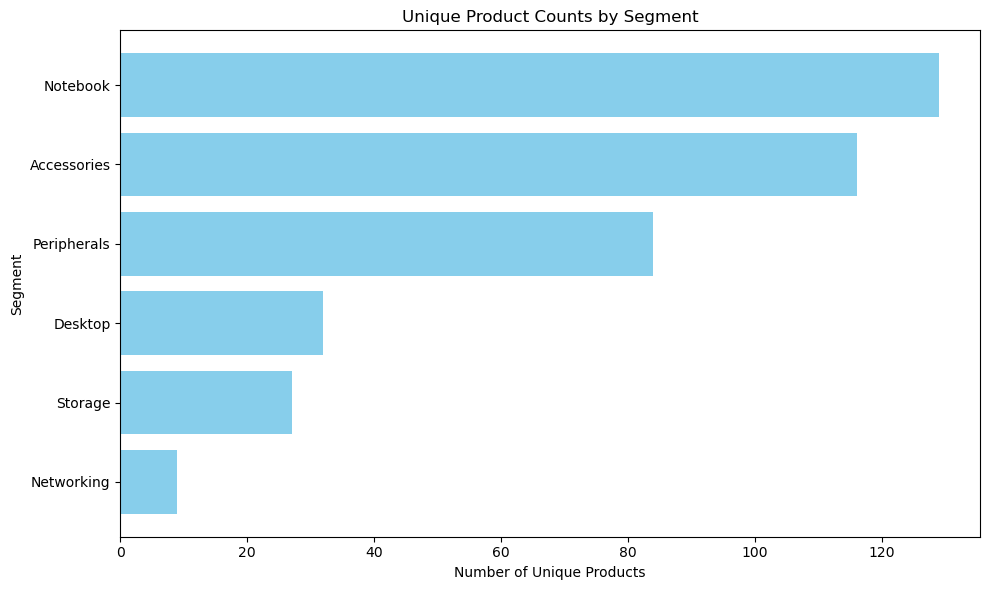

In [42]:
plt.figure(figsize=(10, 6))
plt.barh(
    unique_products_by_segment['segment'],
    unique_products_by_segment['unique_product_count'],
    color='skyblue'
)
plt.gca().invert_yaxis()  # Highest count on top
plt.title('Unique Product Counts by Segment')
plt.xlabel('Number of Unique Products')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

### 4. Determine which segment had the most significant increase in unique products from 2020 to 2021.

In [44]:
# Merge fact_gross_price_df with dim_product_df on 'product_code'
merged_df = pd.merge(fact_gross_price_df, dim_product_df, on='product_code', how='left')

# Filter data for 2020 and 2021 based on fiscal_year
df_2020 = merged_df[merged_df['fiscal_year'] == 2020]
df_2021 = merged_df[merged_df['fiscal_year'] == 2021]

# Count unique products per segment for each fiscal year
unique_2020 = df_2020.groupby('segment')['product_code'].nunique().reset_index(name='unique_product_2020')
unique_2021 = df_2021.groupby('segment')['product_code'].nunique().reset_index(name='unique_product_2021')

# Merge the results of 2020 and 2021 unique counts on 'segment'
segment_unique_products = pd.merge(unique_2020, unique_2021, on='segment', how='outer')

# Calculate the percentage change in unique products
segment_unique_products['percentage_change'] = (
    (segment_unique_products['unique_product_2021'] - segment_unique_products['unique_product_2020']) / segment_unique_products['unique_product_2020']
) * 100

# Find the segment with the most significant increase
max_increase_segment = segment_unique_products.loc[segment_unique_products['percentage_change'].idxmax()]

print(f"Segment with the most significant increase in unique products: {max_increase_segment['segment']}")
print(f"Increase in unique products: {max_increase_segment['percentage_change']}%")



Segment with the most significant increase in unique products: Desktop
Increase in unique products: 214.28571428571428%


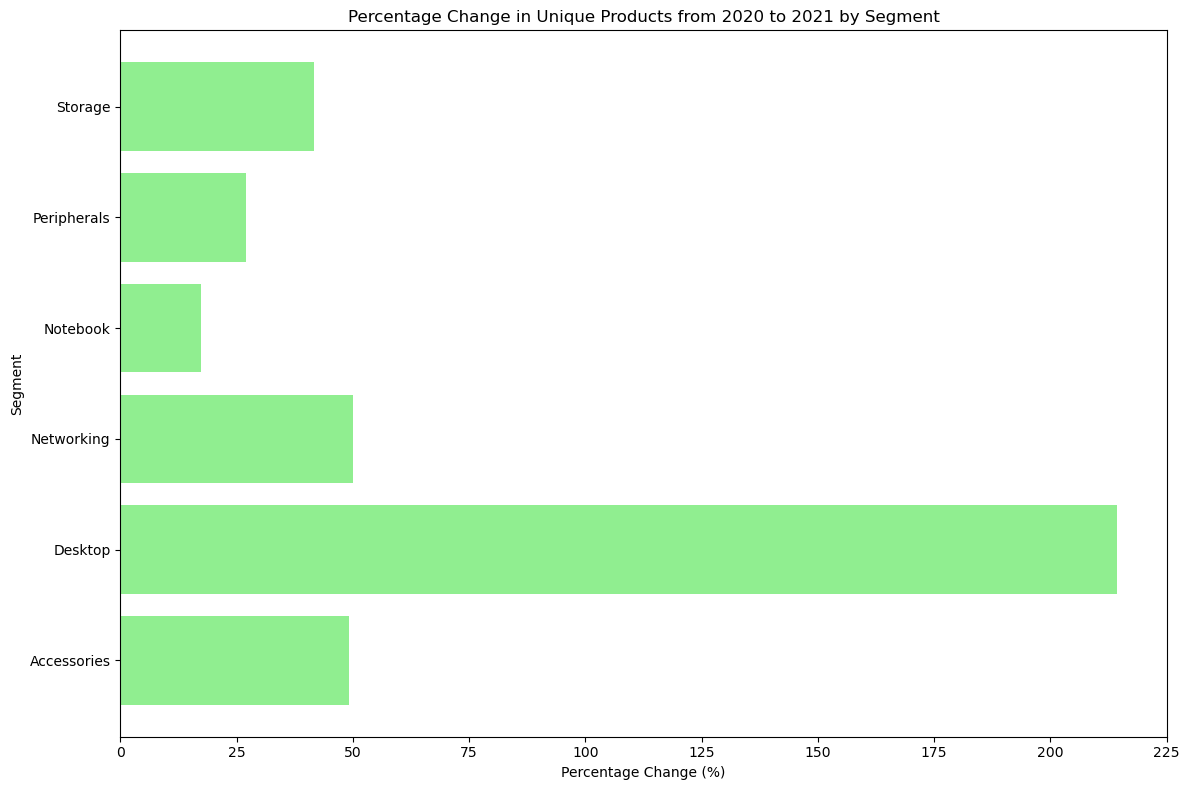

In [45]:

# Plotting the percentage change in unique products by segment
plt.figure(figsize=(12, 8))
plt.barh(segment_unique_products['segment'], segment_unique_products['percentage_change'], color='lightgreen')
plt.title('Percentage Change in Unique Products from 2020 to 2021 by Segment')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()


### 5. Identify the products with the highest and lowest manufacturing costs. Include their respective details and highlight the findings.


In [48]:
fact_manufacturing_cost_df['manufacturing_cost'].max()

240.5364

In [49]:
fact_manufacturing_cost_df['manufacturing_cost'].min()

0.892

In [52]:
manufacturing_products_df = pd.merge(fact_manufacturing_cost_df, dim_product_df, how='inner', on='product_code')
# Sort by manufacturing cost in descending order (highest to lowest)
manufacturing_products_df = manufacturing_products_df.sort_values(by='manufacturing_cost', ascending=False)

# Display the sorted DataFrame
manufacturing_products_df


,product_code,cost_year,manufacturing_cost,division,segment,category,product,variant
534,A6120110206,2021,240.5364,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Plus 3
533,A6120110205,2021,240.3065,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Plus 2
532,A6119110204,2021,238.7739,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Plus 1
531,A6119110203,2021,238.6207,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Standard 3
530,A6119110202,2021,238.2376,PC,Desktop,Personal Desktop,AQ HOME Allin1 Gen 2,Standard 2
...,...,...,...,...,...,...,...,...
136,A2118150102,2020,1.0460,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 2
561,A6818160201,2021,0.9195,N & S,Storage,USB Flash Drives,AQ Pen Drive DRC,Standard
135,A2118150101,2021,0.9195,P & A,Accessories,Mouse,AQ Master wired x1 Ms,Standard 1
560,A6818160201,2020,0.9011,N & S,Storage,USB Flash Drives,AQ Pen Drive DRC,Standard


In [53]:
highest_manufacturing_cost = manufacturing_products_df.iloc[0]
lowest_manufacturing_cost = manufacturing_products_df.iloc[-1]

In [58]:
highest_manufacturing_cost

product_code                   A6120110206
cost_year                             2021
manufacturing_cost                240.5364
division                                PC
segment                            Desktop
category                  Personal Desktop
product               AQ HOME Allin1 Gen 2
variant                             Plus 3
Name: 534, dtype: object

In [59]:
# Step 3: Display the details for highest and lowest manufacturing costs
print("Product with the Highest Manufacturing Cost:")
print(f"Product Code: {highest_manufacturing_cost['product_code']}")
print(f"Product Name: {highest_manufacturing_cost['product']}")
print(f"Manufacturing Cost: {highest_manufacturing_cost['manufacturing_cost']}")
print("\n")

print("Product with the Lowest Manufacturing Cost:")
print(f"Product Code: {lowest_manufacturing_cost['product_code']}")
print(f"Product Name: {lowest_manufacturing_cost['product']}")
print(f"Manufacturing Cost: {lowest_manufacturing_cost['manufacturing_cost']}")

Product with the Highest Manufacturing Cost:
Product Code: A6120110206
Product Name: AQ HOME Allin1 Gen 2
Manufacturing Cost: 240.5364


Product with the Lowest Manufacturing Cost:
Product Code: A2118150101
Product Name: AQ Master wired x1 Ms
Manufacturing Cost: 0.892


### 6. Analyze the top 5 customers who received the highest average pre-invoice discount percentage for the fiscal year 2021 and in the Indian market.

In [63]:
dim_customer_df.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [64]:
fact_pre_invoice_deductions_df.head()

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2020,0.0735
1,70002017,2021,0.0703
2,70002018,2020,0.2255
3,70002018,2021,0.2061
4,70003181,2020,0.0531


In [65]:
# Filter the fact_pre_invoice_deductions_df for fiscal year 2021
fact_2021_df = fact_pre_invoice_deductions_df[fact_pre_invoice_deductions_df['fiscal_year'] == 2021]

# Filter the dim_customer_df for the Indian market
indian_customers_df = dim_customer_df[dim_customer_df['market'] == 'India']

# Merge the filtered DataFrames on 'customer_code'
merged_df = pd.merge(fact_2021_df, indian_customers_df, on='customer_code', how='inner')

# Group by customer and calculate the average pre_invoice_discount_pct
average_discount_df = merged_df.groupby('customer')['pre_invoice_discount_pct'].mean().reset_index()

# Sort by average discount percentage in descending order
sorted_average_discount_df = average_discount_df.sort_values(by='pre_invoice_discount_pct', ascending=False)

# Display the top 5 customers with the highest average discount
top_5_customers = sorted_average_discount_df.head(5)

# Display the top 5 customers
print(top_5_customers)


    customer  pre_invoice_discount_pct
10  Flipkart                    0.3083
16    Viveks                    0.3038
9      Ezone                    0.3028
4      Croma                    0.3025
1    Amazon                     0.2933


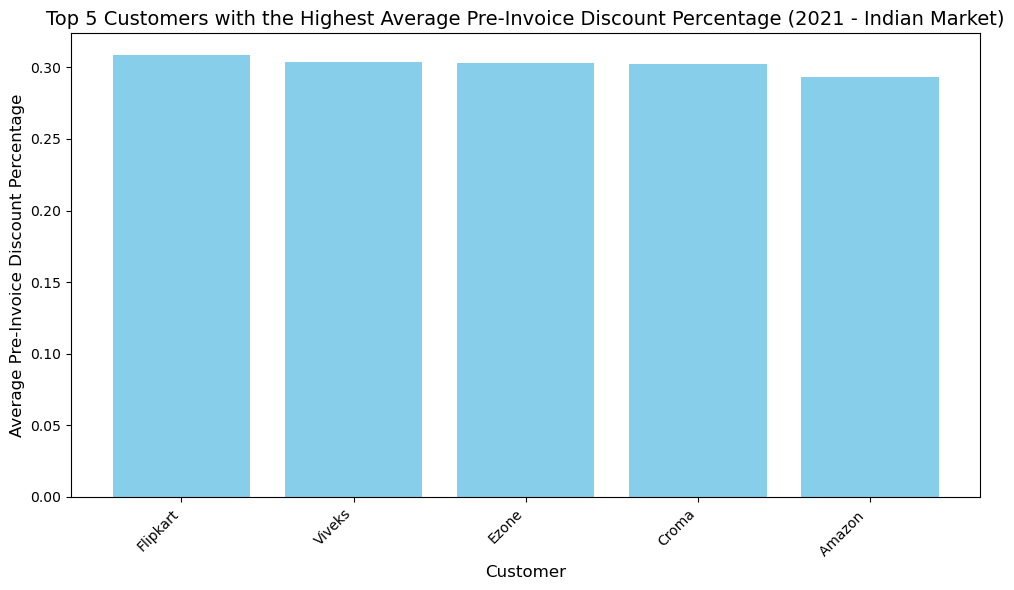

In [66]:
import matplotlib.pyplot as plt

# Step 1: Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Step 2: Create a bar plot
plt.bar(top_5_customers['customer'], top_5_customers['pre_invoice_discount_pct'], color='skyblue')

# Step 3: Add titles and labels
plt.title('Top 5 Customers with the Highest Average Pre-Invoice Discount Percentage (2021 - Indian Market)', fontsize=14)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Average Pre-Invoice Discount Percentage', fontsize=12)

# Step 4: Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Step 5: Display the plot
plt.tight_layout()
plt.show()


### 7. Create a table of the Gross sales amount for the customer “Atliq Exclusive” for each month. This analysis helps to get an idea of low and high-performing months and take strategic decisions. The final table contains these columns:
### • Month 
### • Year 
### • Gross sales 

In [68]:
dim_customer_df.head()

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC


In [69]:
fact_sales_monthly_df.head()

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2019-09-01,A0118150101,70002017,137,2020
1,2019-09-01,A0118150101,70002018,47,2020
2,2019-09-01,A0118150101,70003181,57,2020
3,2019-09-01,A0118150101,70003182,63,2020
4,2019-09-01,A0118150101,70004069,9,2020


In [71]:
fact_gross_price_df.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2020,16.2323
1,A0118150101,2021,19.0573
2,A0118150102,2020,19.8577
3,A0118150102,2021,21.4565
4,A0118150103,2020,22.1317


In [73]:
# Filter for "Atliq Exclusive" customer
atliq_exclusive_customers = dim_customer_df[dim_customer_df['customer'] == 'Atliq Exclusive']

# Merge with fact_sales_monthly_df and fact_gross_price_df
# Merge fact_sales_monthly_df with dim_customer_df to filter for "Atliq Exclusive"
atliq_sales = pd.merge(fact_sales_monthly_df, atliq_exclusive_customers[['customer_code']], on='customer_code')

# Merge the result with fact_gross_price_df to get the gross_price for each product
atliq_sales_with_price = pd.merge(atliq_sales, fact_gross_price_df, on='product_code')

# Calculate Gross Sales (sold_quantity * gross_price)
atliq_sales_with_price['gross_sales'] = atliq_sales_with_price['sold_quantity'] * atliq_sales_with_price['gross_price']

# Extract Month and Year from the 'date' column
atliq_sales_with_price['month'] = pd.to_datetime(atliq_sales_with_price['date']).dt.month
atliq_sales_with_price['year'] = pd.to_datetime(atliq_sales_with_price['date']).dt.year

# Group by month and year to get the total Gross Sales
gross_sales_table = atliq_sales_with_price.groupby(['year', 'month'], as_index=False)['gross_sales'].sum()

# Display the final table
gross_sales_table


,year,month,gross_sales
0,2019,9,9.092670e+06
1,2019,10,1.037864e+07
2,2019,11,1.523189e+07
3,2019,12,9.755795e+06
4,2020,1,9.584952e+06
5,2020,2,8.083996e+06
6,2020,3,7.669765e+05
7,2020,4,8.000720e+05
8,2020,5,1.586964e+06
9,2020,6,3.429737e+06


### 8. Which quarter of 2020, got the maximum total_sold_quantity?

In [75]:
# Step 1: Convert 'date' to datetime format and extract the fiscal year and quarter
fact_sales_monthly_df['date'] = pd.to_datetime(fact_sales_monthly_df['date'])
fact_sales_monthly_df['quarter'] = fact_sales_monthly_df['date'].dt.to_period('Q')  # Extract quarter (Q1, Q2, Q3, Q4)

# Step 2: Filter the data for the year 2020
fact_sales_2020_df = fact_sales_monthly_df[fact_sales_monthly_df['fiscal_year'] == 2020]

# Step 3: Group by quarter and sum the 'sold_quantity'
quarter_sales_2020 = fact_sales_2020_df.groupby('quarter')['sold_quantity'].sum()

# Step 4: Find the quarter with the maximum total sold quantity
max_quarter = quarter_sales_2020.idxmax()  # This will give the quarter with the maximum sold quantity
max_quantity = quarter_sales_2020.max()  # This will give the maximum sold quantity

# Display the results
print(f"The quarter with the maximum total sold quantity in 2020 is {max_quarter} with {max_quantity} sold units.")


The quarter with the maximum total sold quantity in 2020 is 2019Q4 with 8425822 sold units.


### 9. Determine which channel contributed the most to gross sales in FY 2021 and calculate its percentage contribution

In [76]:
# Step 1: Filter data for fiscal year 2021
fact_sales_2021_df = fact_sales_monthly_df[fact_sales_monthly_df['fiscal_year'] == 2021]

# Step 2: Merge sales data with gross price and customer data
merged_sales_df = pd.merge(fact_sales_2021_df, fact_gross_price_df[['product_code', 'fiscal_year', 'gross_price']], on='product_code', how='inner')
merged_sales_df = pd.merge(merged_sales_df, dim_customer_df[['customer_code', 'channel']], on='customer_code', how='inner')

# Step 3: Calculate total gross sales
merged_sales_df['gross_sales'] = merged_sales_df['sold_quantity'] * merged_sales_df['gross_price']

# Step 4: Group by channel and sum the gross sales
channel_sales = merged_sales_df.groupby('channel')['gross_sales'].sum()

# Step 5: Find the channel with the maximum gross sales and calculate the percentage contribution
max_channel = channel_sales.idxmax()
max_channel_sales = channel_sales.max()
total_sales = channel_sales.sum()
percentage_contribution = (max_channel_sales / total_sales) * 100

# Display the results
print(f"The channel that contributed the most to gross sales in FY 2021 is {max_channel} with a total of {max_channel_sales} gross sales.")
print(f"The percentage contribution of {max_channel} to the total gross sales is {percentage_contribution:.2f}%")


The channel that contributed the most to gross sales in FY 2021 is Retailer with a total of 1924170397.9096 gross sales.
The percentage contribution of Retailer to the total gross sales is 73.22%


### 10. Identify the top 3 products in each division based on total sold quantities for the fiscal year 2021. Rank them and provide the findings.

In [77]:
# Step 1: Filter sales data for fiscal year 2021
fact_sales_2021_df = fact_sales_monthly_df[fact_sales_monthly_df['fiscal_year'] == 2021]

# Step 2: Merge sales data with product data to get the division
merged_sales_products_df = pd.merge(fact_sales_2021_df, dim_product_df[['product_code', 'division']], on='product_code', how='inner')

# Step 3: Group by division and product code, summing the sold quantities
product_sales_by_division = merged_sales_products_df.groupby(['division', 'product_code'])['sold_quantity'].sum().reset_index()

# Step 4: Rank the products within each division based on total sold quantity
product_sales_by_division['rank'] = product_sales_by_division.groupby('division')['sold_quantity'].rank(ascending=False, method='first')

# Step 5: Get the top 3 products for each division
top_3_products_by_division = product_sales_by_division[product_sales_by_division['rank'] <= 3]

# Display the results
print("Top 3 Products by Division (Based on Total Sold Quantities in FY 2021):")
print(top_3_products_by_division[['division', 'product_code', 'sold_quantity', 'rank']])


Top 3 Products by Division (Based on Total Sold Quantities in FY 2021):
    division product_code  sold_quantity  rank
13     N & S  A6720160103         701373   1.0
15     N & S  A6818160202         688003   2.0
16     N & S  A6819160203         676245   3.0
114    P & A  A2319150302         428498   1.0
125    P & A  A2520150501         419865   2.0
128    P & A  A2520150504         419471   3.0
208       PC  A4218110202          17434   1.0
214       PC  A4218110208          17275   3.0
220       PC  A4319110306          17280   2.0


C:\Users\prvzs\AppData\Local\Temp\ipykernel_16416\2387383963.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_3_products_by_division,


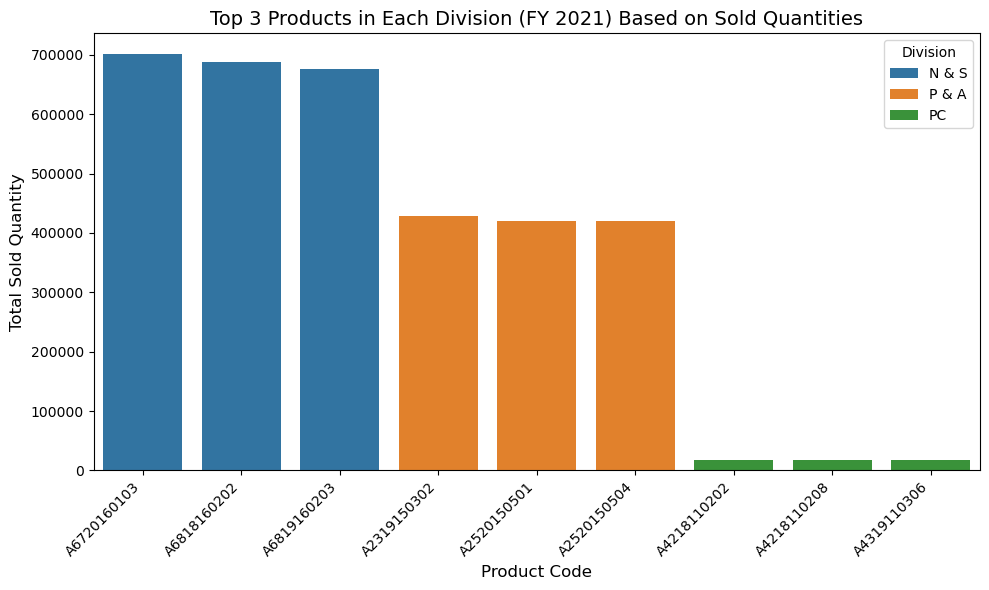

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 3 products by division
plt.figure(figsize=(10, 6))

# Creating the bar plot
sns.barplot(data=top_3_products_by_division, 
            x='product_code', 
            y='sold_quantity', 
            hue='division', 
            ci=None)

# Adding labels and title
plt.title('Top 3 Products in Each Division (FY 2021) Based on Sold Quantities', fontsize=14)
plt.xlabel('Product Code', fontsize=12)
plt.ylabel('Total Sold Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Division')

# Show plot
plt.tight_layout()
plt.show()
